In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
import tensorflow as tf
import warnings # Supress warnings
warnings.filterwarnings('ignore')

Input

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Thesis/Datasets

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Thesis/Datasets


In [ ]:
df = pd.read_csv("weekly_sales_data.csv")
# Convert the 'Date' column to datetime type
#df['Date'] = pd.to_datetime(df['Unnamed: 0'])
#df.drop('Unnamed: 0', axis=1, inplace=True)
# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

In [ ]:
df.tail()

,sales
Date,
2017-12-03,6965.08
2017-12-10,8792.00
2017-12-17,4637.00
2017-12-24,7271.00
2017-12-31,4036.00


# Function Definition

plot data

In [ ]:
def plot_series(x, y, format="-", start=0, end=None,
                title=None, xlabel=None, ylabel=None, legend=None ):
    """
    Visualizes time series data

    Args:
      x (array of int) - contains values for the x-axis
      y (array of int or tuple of arrays) - contains the values for the y-axis
      format (string) - line style when plotting the graph
      start (int) - first time step to plot
      end (int) - last time step to plot
      title (string) - title of the plot
      xlabel (string) - label for the x-axis
      ylabel (string) - label for the y-axis
      legend (list of strings) - legend for the plot
    """

    # Setup dimensions of the graph figure
    plt.figure(figsize=(16, 9))
    ax = plt.axes()
    ax.set_facecolor('None')
    # Check if there are more than two series to plot
    if type(y) is tuple:

      # Loop over the y elements
      for y_curr in y:

        # Plot the x and current y values
        plt.plot(x[start:end], y_curr[start:end], format)

    else:
      # Plot the x and y values
      plt.plot(x[start:end], y[start:end], format)

    # Label the x-axis
    plt.xlabel(xlabel)
    #plt.xticks(rotation=90)
    # Label the y-axis
    plt.ylabel(ylabel)

    # Set the legend
    if legend:
      plt.legend(legend)

    # Set the title
    plt.title(title)

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()

In [ ]:
df['sales'] = df['sales'] / 1000

<class 'numpy.ndarray'>


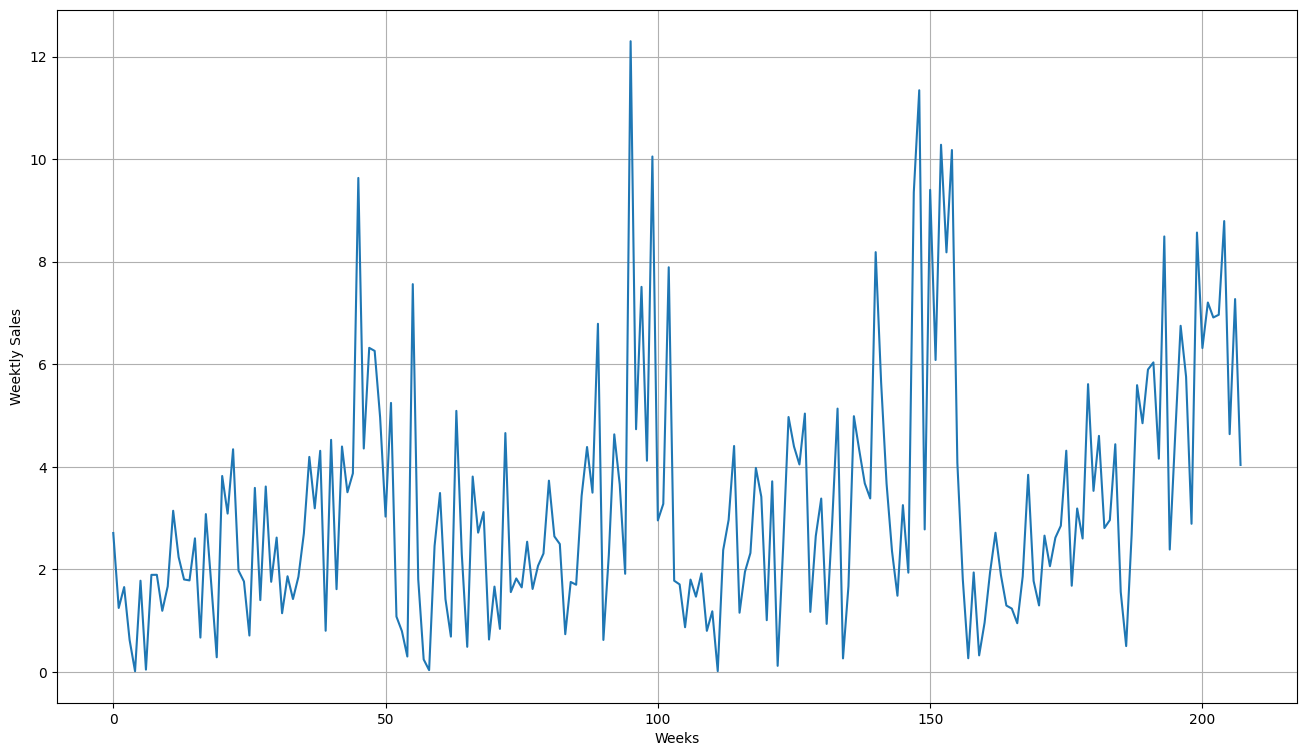

In [ ]:
# Parameters
time = np.arange(len(df.index), dtype="float32")
date = df.index
series = df['sales'].values
print(type(series))

# Plot the results
#plot_series(date, series)

# Preview the data
plot_series(time, series, xlabel='Weeks', ylabel='Weektly Sales')

# Convert to Time Series Data

In [ ]:
'''# Convert 'Order Date' column to proper date format and rename it to 'Date'
df['Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')

# Divide the dataset according to categories
category_data = {}
for category, data in df.groupby('Category'):
    category_data[category] = data

# Create a new DataFrame for time series data
series = pd.DataFrame()

# Iterate over each category
for category, data in category_data.items():
    # Resample the data by day and sum the sales
    daily_sales = data.resample('D', on='Date')['Sales'].sum()

    # Add the daily sales data to the time series DataFrame
    series[category] = daily_sales

# Print the resulting time series data
print(series.head())'''

"# Convert 'Order Date' column to proper date format and rename it to 'Date'\ndf['Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')\n\n# Divide the dataset according to categories\ncategory_data = {}\nfor category, data in df.groupby('Category'):\n    category_data[category] = data\n\n# Create a new DataFrame for time series data\nseries = pd.DataFrame()\n\n# Iterate over each category\nfor category, data in category_data.items():\n    # Resample the data by day and sum the sales\n    daily_sales = data.resample('D', on='Date')['Sales'].sum()\n\n    # Add the daily sales data to the time series DataFrame\n    series[category] = daily_sales\n\n# Print the resulting time series data\nprint(series.head())"

# Data Visualization

In [ ]:
'''# calculate total no of days
num_days = len(series.index)
print("Number of days:", num_days)

# Parameters
days = np.arange(num_days, dtype="float32")'''

'# calculate total no of days\nnum_days = len(series.index)\nprint("Number of days:", num_days)\n\n# Parameters\ndays = np.arange(num_days, dtype="float32")'

In [ ]:
'''# Plot the time series data using seaborn.lineplot
plt.figure(figsize=(20, 12))
for category in series.columns:
    sns.lineplot(data=series[category], label=category)

plt.title("Sales Time Series")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()'''

'# Plot the time series data using seaborn.lineplot\nplt.figure(figsize=(20, 12))\nfor category in series.columns:\n    sns.lineplot(data=series[category], label=category)\n\nplt.title("Sales Time Series")\nplt.xlabel("Date")\nplt.ylabel("Sales")\nplt.legend()\nplt.show()'

In [ ]:
'''f, ax = plt.subplots(nrows=3, ncols=1, figsize=(20, 12))

# Set the style to whitegrid
sns.set_style("whitegrid")

for i, column in enumerate(series.columns):
    sns.lineplot(x=series.index, y=series[column], ax=ax[i], color='dodgerblue')
    ax[i].set_title('{}'.format(column), fontsize=14)
    ax[i].set_ylabel(ylabel='Sales', fontsize=14)
    ax[i].set_facecolor('None')
    ax[i].grid(True)

# Remove the top and right spines
sns.despine()

# Adjust spacing between subplots
plt.tight_layout()

# Set a transparent background
f.patch.set_facecolor('none')'''

'f, ax = plt.subplots(nrows=3, ncols=1, figsize=(20, 12))\n\n# Set the style to whitegrid\nsns.set_style("whitegrid")\n\nfor i, column in enumerate(series.columns):\n    sns.lineplot(x=series.index, y=series[column], ax=ax[i], color=\'dodgerblue\')\n    ax[i].set_title(\'{}\'.format(column), fontsize=14)\n    ax[i].set_ylabel(ylabel=\'Sales\', fontsize=14)\n    ax[i].set_facecolor(\'None\')\n    ax[i].grid(True)\n\n# Remove the top and right spines\nsns.despine()\n\n# Adjust spacing between subplots\nplt.tight_layout()\n\n# Set a transparent background\nf.patch.set_facecolor(\'none\')'

# Data Preprocessing

Handle Missing Values

In [ ]:
'''# Replace all 0 values with NaN (missing values)
series.replace(0, np.nan, inplace=True)'''

'# Replace all 0 values with NaN (missing values)\nseries.replace(0, np.nan, inplace=True)'

In [ ]:
#series.isna().sum()

In [ ]:
'''f, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
f.patch.set_facecolor('none')
sns.heatmap(series.T.isna(), cmap='Blues', cbar=False)
ax.set_title('Missing Values', fontsize=16)

ax.set_xticklabels([])
#ax.set_yticklabels([])

plt.show()'''

"f, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))\nf.patch.set_facecolor('none')\nsns.heatmap(series.T.isna(), cmap='Blues', cbar=False)\nax.set_title('Missing Values', fontsize=16)\n\nax.set_xticklabels([])\n#ax.set_yticklabels([])\n\nplt.show()"

In [ ]:
'''f, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

# Select the column to be plotted
column_to_plot = 'Furniture'
sns.heatmap(series[column_to_plot].isna().to_frame().T, cmap='Blues', cbar=False, ax=ax)
ax.set_title('Furniture', fontsize=16)

ax.set_xticks([])  # Remove x-axis ticks
ax.set_yticklabels(['Missing Values'], fontsize=14)  # Set y-axis tick labels
ax.set_ylabel('')  # Remove y-axis label

plt.show()'''

"f, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))\n\n# Select the column to be plotted\ncolumn_to_plot = 'Furniture'\nsns.heatmap(series[column_to_plot].isna().to_frame().T, cmap='Blues', cbar=False, ax=ax)\nax.set_title('Furniture', fontsize=16)\n\nax.set_xticks([])  # Remove x-axis ticks\nax.set_yticklabels(['Missing Values'], fontsize=14)  # Set y-axis tick labels\nax.set_ylabel('')  # Remove y-axis label\n\nplt.show()"

In [ ]:
'''f, ax = plt.subplots(nrows=4, ncols=1, figsize=(20, 12))

sns.lineplot(x=series.index, y=series['Furniture'].fillna(0), ax=ax[0], color='darkorange', label = 'modified')
sns.lineplot(x=series.index, y=series['Furniture'].fillna(np.inf), ax=ax[0], color='dodgerblue', label = 'original')
ax[0].set_title('Fill NaN with 0', fontsize=14)
ax[0].set_xlabel('')
ax[0].set_ylabel(ylabel = 'Sales', fontsize=14)
ax[0].set_facecolor('none')

mean_sales = series['Furniture'].mean()
sns.lineplot(x=series.index, y=series['Furniture'].fillna(mean_sales), ax=ax[1], color='darkorange', label = 'modified')
sns.lineplot(x=series.index, y=series['Furniture'].fillna(np.inf), ax=ax[1], color='dodgerblue', label = 'original')
ax[1].set_title(f'Fill NaN with Mean Value ({mean_sales:.0f})', fontsize=14)
ax[1].set_xlabel('')
ax[1].set_ylabel(ylabel = 'Sales', fontsize=14)
ax[1].set_facecolor('none')

sns.lineplot(x=series.index, y=series['Furniture'].ffill(), ax=ax[2], color='darkorange', label = 'modified')
sns.lineplot(x=series.index, y=series['Furniture'].fillna(np.inf), ax=ax[2], color='dodgerblue', label = 'original')
ax[2].set_title(f'FFill', fontsize=14)
ax[2].set_xlabel('')
ax[2].set_ylabel(ylabel = 'Sales', fontsize=14)
ax[2].set_facecolor('none')

sns.lineplot(x=series.index, y=series['Furniture'].interpolate(), ax=ax[3], color='darkorange', label = 'modified')
sns.lineplot(x=series.index, y=series['Furniture'].fillna(np.inf), ax=ax[3], color='dodgerblue', label = 'original')
ax[3].set_title(f'Interpolate', fontsize=14)
ax[3].set_xlabel('')
ax[3].set_ylabel(ylabel = 'Sales', fontsize=14)
ax[3].set_facecolor('none')

ax[-1].set_xlabel("Date", )

# Set a transparent background
f.patch.set_facecolor('none')
plt.tight_layout()
plt.show()'''

'f, ax = plt.subplots(nrows=4, ncols=1, figsize=(20, 12))\n\nsns.lineplot(x=series.index, y=series[\'Furniture\'].fillna(0), ax=ax[0], color=\'darkorange\', label = \'modified\')\nsns.lineplot(x=series.index, y=series[\'Furniture\'].fillna(np.inf), ax=ax[0], color=\'dodgerblue\', label = \'original\')\nax[0].set_title(\'Fill NaN with 0\', fontsize=14)\nax[0].set_xlabel(\'\')\nax[0].set_ylabel(ylabel = \'Sales\', fontsize=14)\nax[0].set_facecolor(\'none\')\n\nmean_sales = series[\'Furniture\'].mean()\nsns.lineplot(x=series.index, y=series[\'Furniture\'].fillna(mean_sales), ax=ax[1], color=\'darkorange\', label = \'modified\')\nsns.lineplot(x=series.index, y=series[\'Furniture\'].fillna(np.inf), ax=ax[1], color=\'dodgerblue\', label = \'original\')\nax[1].set_title(f\'Fill NaN with Mean Value ({mean_sales:.0f})\', fontsize=14)\nax[1].set_xlabel(\'\')\nax[1].set_ylabel(ylabel = \'Sales\', fontsize=14)\nax[1].set_facecolor(\'none\')\n\nsns.lineplot(x=series.index, y=series[\'Furniture\'].f

Interpolate Missing Values

In [ ]:
'''series['Furniture'] = series['Furniture'].interpolate()
series['Office Supplies'] = series['Office Supplies'].interpolate()
series['Technology'] = series['Technology'].interpolate()'''

"series['Furniture'] = series['Furniture'].interpolate()\nseries['Office Supplies'] = series['Office Supplies'].interpolate()\nseries['Technology'] = series['Technology'].interpolate()"

Convert into Numpy Array

In [ ]:
'''# Convert DataFrame column to NumPy array
furniture = series['Furniture'].values
office = series['Office Supplies'].values
tech = series['Technology'].values'''

"# Convert DataFrame column to NumPy array\nfurniture = series['Furniture'].values\noffice = series['Office Supplies'].values\ntech = series['Technology'].values"

# Resampling

Resampling Data into Months

In [ ]:
'''# Resample the data into monthly intervals
monthly_data = series.resample('M').sum()

# calculate total no of months
num_months = len(monthly_data.index)
print("Number of months:", num_months)

# Parameters
months = np.arange(num_months, dtype="float32")'''

'# Resample the data into monthly intervals\nmonthly_data = series.resample(\'M\').sum()\n\n# calculate total no of months\nnum_months = len(monthly_data.index)\nprint("Number of months:", num_months)\n\n# Parameters\nmonths = np.arange(num_months, dtype="float32")'

In [ ]:
'''# Plot the resampled data as a line graph
plt.figure(figsize=(10, 6))
for category in monthly_data.columns:
    plt.plot(months, monthly_data[category], label=category, linestyle='-')

plt.title("Monthly Sales Time Series")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()'''

'# Plot the resampled data as a line graph\nplt.figure(figsize=(10, 6))\nfor category in monthly_data.columns:\n    plt.plot(months, monthly_data[category], label=category, linestyle=\'-\')\n\nplt.title("Monthly Sales Time Series")\nplt.xlabel("Date")\nplt.ylabel("Sales")\nplt.legend()\nplt.show()'

In [ ]:
'''# Create subplots for each category
fig, axes = plt.subplots(len(monthly_data.columns), 1, figsize=(10, 6))

# Iterate over each category and plot in a separate subplot
for i, category in enumerate(monthly_data.columns):
    axes[i].plot(monthly_data.index, monthly_data[category], label=category, linestyle='-')
    axes[i].set_title(category)
    axes[i].set_ylabel("Sales")
    axes[i].grid(True)
    axes[i].set_facecolor('none')

# Set common xlabel
axes[-1].set_xlabel("Date")

# Adjust spacing between subplots
plt.tight_layout()

# Set a transparent background
fig.patch.set_facecolor('none')

# Display the subplots
plt.show()'''

'# Create subplots for each category\nfig, axes = plt.subplots(len(monthly_data.columns), 1, figsize=(10, 6))\n\n# Iterate over each category and plot in a separate subplot\nfor i, category in enumerate(monthly_data.columns):\n    axes[i].plot(monthly_data.index, monthly_data[category], label=category, linestyle=\'-\')\n    axes[i].set_title(category)\n    axes[i].set_ylabel("Sales")\n    axes[i].grid(True)\n    axes[i].set_facecolor(\'none\')\n\n# Set common xlabel\naxes[-1].set_xlabel("Date")\n\n# Adjust spacing between subplots\nplt.tight_layout()\n\n# Set a transparent background\nfig.patch.set_facecolor(\'none\')\n\n# Display the subplots\nplt.show()'

Resample Data into Weeks

In [ ]:
'''weekly_data = series.resample('W').mean()

# calculate total no of months
num_weeks = len(df.index)
print("Number of weeks:", num_weeks)

# Parameters
weeks = np.arange(num_weeks, dtype="float32")'''

'weekly_data = series.resample(\'W\').mean()\n\n# calculate total no of months\nnum_weeks = len(df.index)\nprint("Number of weeks:", num_weeks)\n\n# Parameters\nweeks = np.arange(num_weeks, dtype="float32")'

In [ ]:
'''# Create subplots for each category
fig, axes = plt.subplots(len(weekly_data.columns), 1, figsize=(10, 6))

# Iterate over each category and plot in a separate subplot
for i, category in enumerate(weekly_data.columns):
    axes[i].plot(df.index, weekly_data[category], label=category, linestyle='-')
    axes[i].set_title(category)
    axes[i].set_ylabel("Sales")
    axes[i].grid(True)
    axes[i].set_facecolor('none')

# Set common xlabel
axes[-1].set_xlabel("Date")

# Adjust spacing between subplots
plt.tight_layout()

# Set a transparent background
fig.patch.set_facecolor('none')

# Display the subplots
plt.show()'''

'# Create subplots for each category\nfig, axes = plt.subplots(len(weekly_data.columns), 1, figsize=(10, 6))\n\n# Iterate over each category and plot in a separate subplot\nfor i, category in enumerate(weekly_data.columns):\n    axes[i].plot(df.index, weekly_data[category], label=category, linestyle=\'-\')\n    axes[i].set_title(category)\n    axes[i].set_ylabel("Sales")\n    axes[i].grid(True)\n    axes[i].set_facecolor(\'none\')\n\n# Set common xlabel\naxes[-1].set_xlabel("Date")\n\n# Adjust spacing between subplots\nplt.tight_layout()\n\n# Set a transparent background\nfig.patch.set_facecolor(\'none\')\n\n# Display the subplots\nplt.show()'

# Save Preprocessed Data

In [ ]:
'''sales_df = pd.DataFrame({
    'sales': series['Furniture']
}, index=series.index)

sales_df.to_csv('preprocessed_sales_data.csv')'''

"sales_df = pd.DataFrame({\n    'sales': series['Furniture']\n}, index=series.index)\n\nsales_df.to_csv('preprocessed_sales_data.csv')"

# Stationarity

Mean and Variance over Time

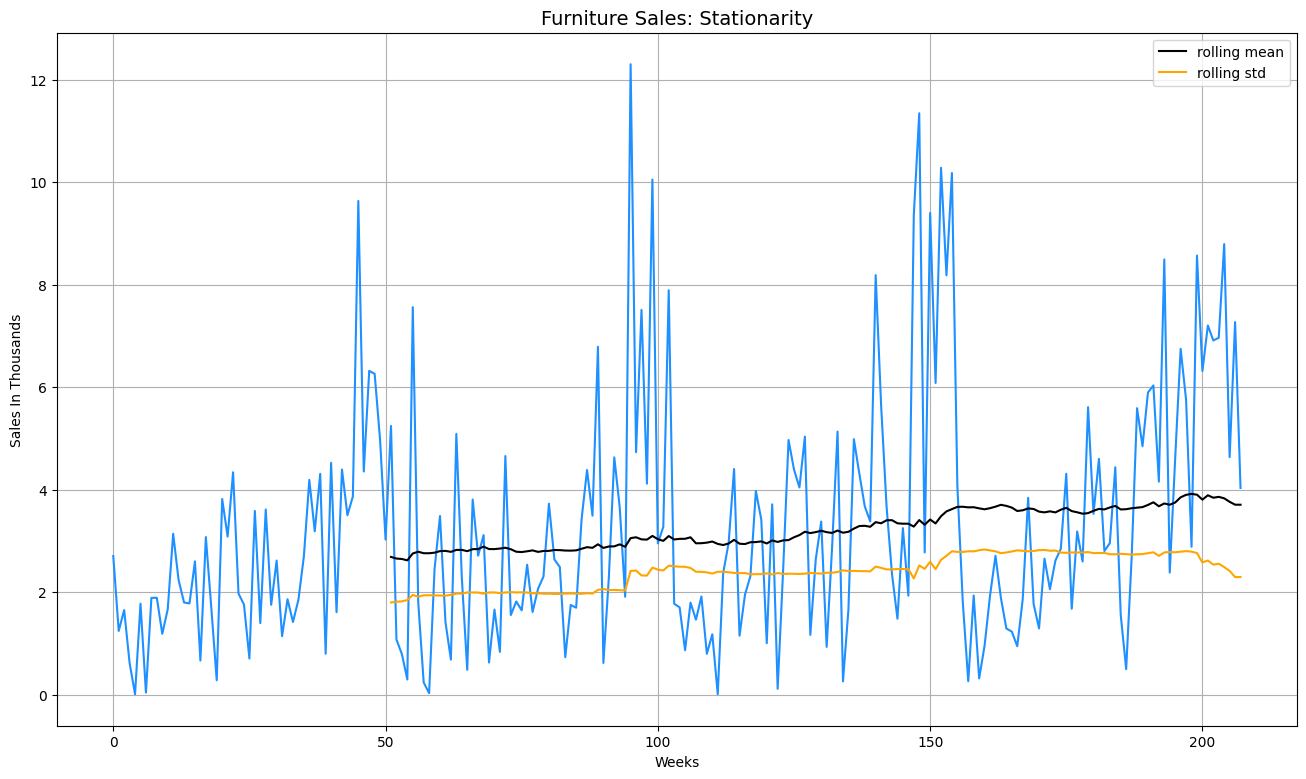

In [ ]:
rolling_window = 52
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))
f.patch.set_facecolor('none')  # Set transparent background

sns.lineplot(x=time, y=df['sales'], ax=ax, color='dodgerblue')
sns.lineplot(x=time, y=df['sales'].rolling(rolling_window).mean(), ax=ax, color='black', label='rolling mean')
sns.lineplot(x=time, y=df['sales'].rolling(rolling_window).std(), ax=ax, color='orange', label='rolling std')
ax.set_title('Furniture Sales: Stationarity', fontsize=14)
ax.set_ylabel(ylabel='Sales In Thousands')
ax.set_xlabel(xlabel='Weeks')
#ax.set_xlim(df.index[0], df.index[-1], auto = True)
#plt.xticks(rotation=90)
ax.set_facecolor('None')
ax.grid(True)
plt.show()


In [ ]:
'''rolling_window = 12
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
f.patch.set_facecolor('none')  # Set transparent background

sns.lineplot(x=monthly_data.index, y=monthly_data['Furniture'], ax=ax, color='dodgerblue')
sns.lineplot(x=monthly_data.index, y=monthly_data['Furniture'].rolling(rolling_window).mean(), ax=ax, color='black', label='rolling mean')
sns.lineplot(x=monthly_data.index, y=monthly_data['Furniture'].rolling(rolling_window).std(), ax=ax, color='orange', label='rolling std')
ax.set_title('Furniture Sales: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax.set_ylabel(ylabel='Sales', fontsize=14)
ax.set_xlim([monthly_data.index[0], monthly_data.index[-1]])

plt.show()
'''

"rolling_window = 12\nf, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))\nf.patch.set_facecolor('none')  # Set transparent background\n\nsns.lineplot(x=monthly_data.index, y=monthly_data['Furniture'], ax=ax, color='dodgerblue')\nsns.lineplot(x=monthly_data.index, y=monthly_data['Furniture'].rolling(rolling_window).mean(), ax=ax, color='black', label='rolling mean')\nsns.lineplot(x=monthly_data.index, y=monthly_data['Furniture'].rolling(rolling_window).std(), ax=ax, color='orange', label='rolling std')\nax.set_title('Furniture Sales: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)\nax.set_ylabel(ylabel='Sales', fontsize=14)\nax.set_xlim([monthly_data.index[0], monthly_data.index[-1]])\n\nplt.show()\n"

In [ ]:
'''rolling_window = 52
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
f.patch.set_facecolor('none')  # Set transparent background

sns.lineplot(x=df.index, y=df, ax=ax, color='dodgerblue')
sns.lineplot(x=df.index, y=df.rolling(rolling_window).mean(), ax=ax, color='black', label='rolling mean')
sns.lineplot(x=df.index, y=df.rolling(rolling_window).std(), ax=ax, color='orange', label='rolling std')
ax.set_title('Furniture Sales: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax.set_ylabel(ylabel='Sales', fontsize=14)
ax.set_xlim([df.index[0], df.index[-1]])

plt.show()
'''

"rolling_window = 52\nf, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))\nf.patch.set_facecolor('none')  # Set transparent background\n\nsns.lineplot(x=df.index, y=df, ax=ax, color='dodgerblue')\nsns.lineplot(x=df.index, y=df.rolling(rolling_window).mean(), ax=ax, color='black', label='rolling mean')\nsns.lineplot(x=df.index, y=df.rolling(rolling_window).std(), ax=ax, color='orange', label='rolling std')\nax.set_title('Furniture Sales: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)\nax.set_ylabel(ylabel='Sales', fontsize=14)\nax.set_xlim([df.index[0], df.index[-1]])\n\nplt.show()\n"

ADF Test

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test on the column 'Sales'
result = adfuller(df)

# Extract the test statistic, p-value, and critical values
test_statistic = result[0]
p_value = result[1]
critical_values = result[4]

# Define a significance level (e.g., 0.05)
significance_level = 0.05

# Check if the p-value is less than the significance level
if p_value < significance_level:
    print("The time series is stationary")
else:
    print("The time series is not stationary")

# Print the test statistic, p-value, and critical values
print("Test statistic:", test_statistic)
print("p-value:", p_value)
print("Critical values:")
for key, value in critical_values.items():
    print(f"{key}: {value}")


The time series is stationary
Test statistic: -3.88974451200493
p-value: 0.0021116316993571916
Critical values:
1%: -3.462818103072159
5%: -2.8758145932936805
10%: -2.574378674548251


Autocorrealtion and Partial Autocorrelation

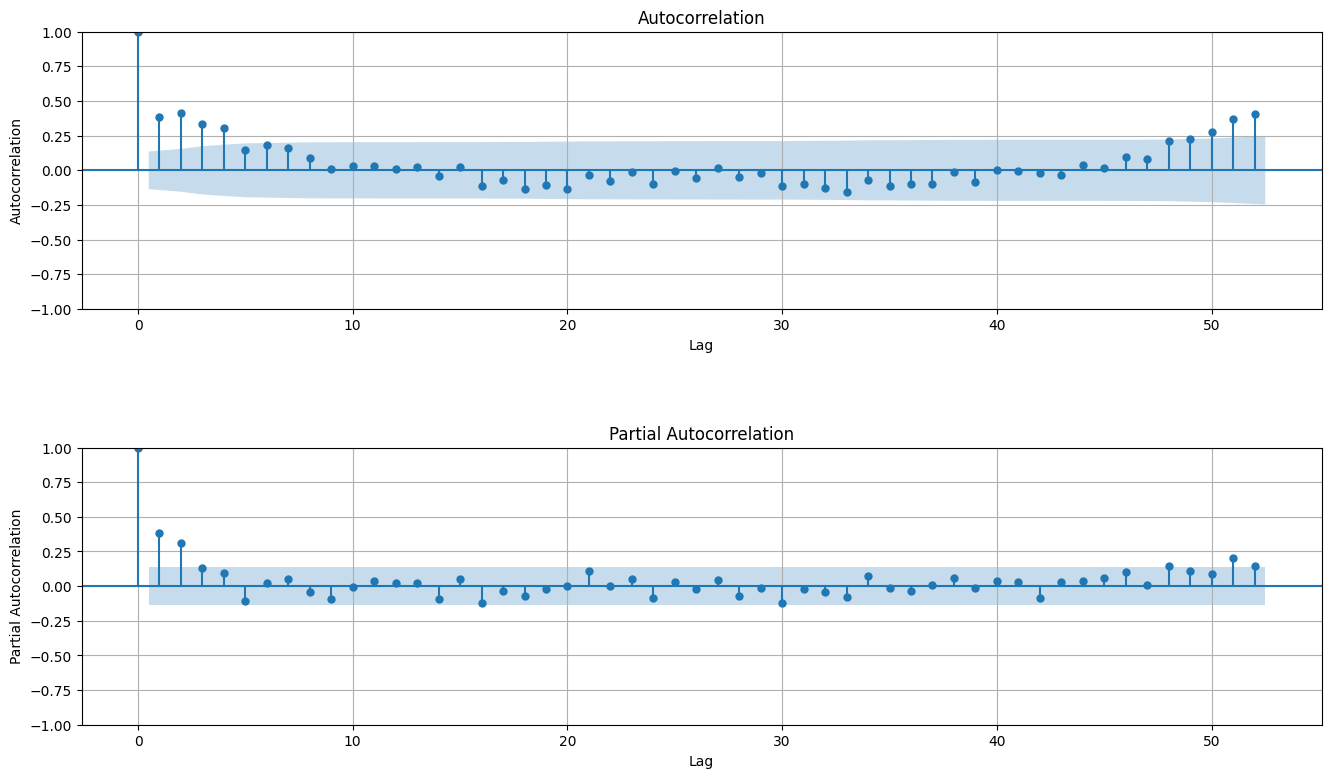

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 9))
fig.patch.set_facecolor('none')  # Set transparent background

# Plot autocorrelation
plot_acf(df, ax=ax1, lags=52)
ax1.set_title('Autocorrelation')
ax1.set_xlabel('Lag')
ax1.set_ylabel('Autocorrelation')
ax1.grid(True)

# Plot partial autocorrelation
plot_pacf(df, ax=ax2, lags=52)
ax2.set_title('Partial Autocorrelation')
ax2.set_xlabel('Lag')
ax2.set_ylabel('Partial Autocorrelation')
ax2.grid(True)
# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Show the plot
plt.show()


# Time Series Decomposition

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

core_columns =  [
    'sales'
]

for column in core_columns:
    decomp = seasonal_decompose(df[column], period=52, model='additive', extrapolate_trend='freq')
    df[f"{column}_trend"] = decomp.trend
    df[f"{column}_seasonal"] = decomp.seasonal

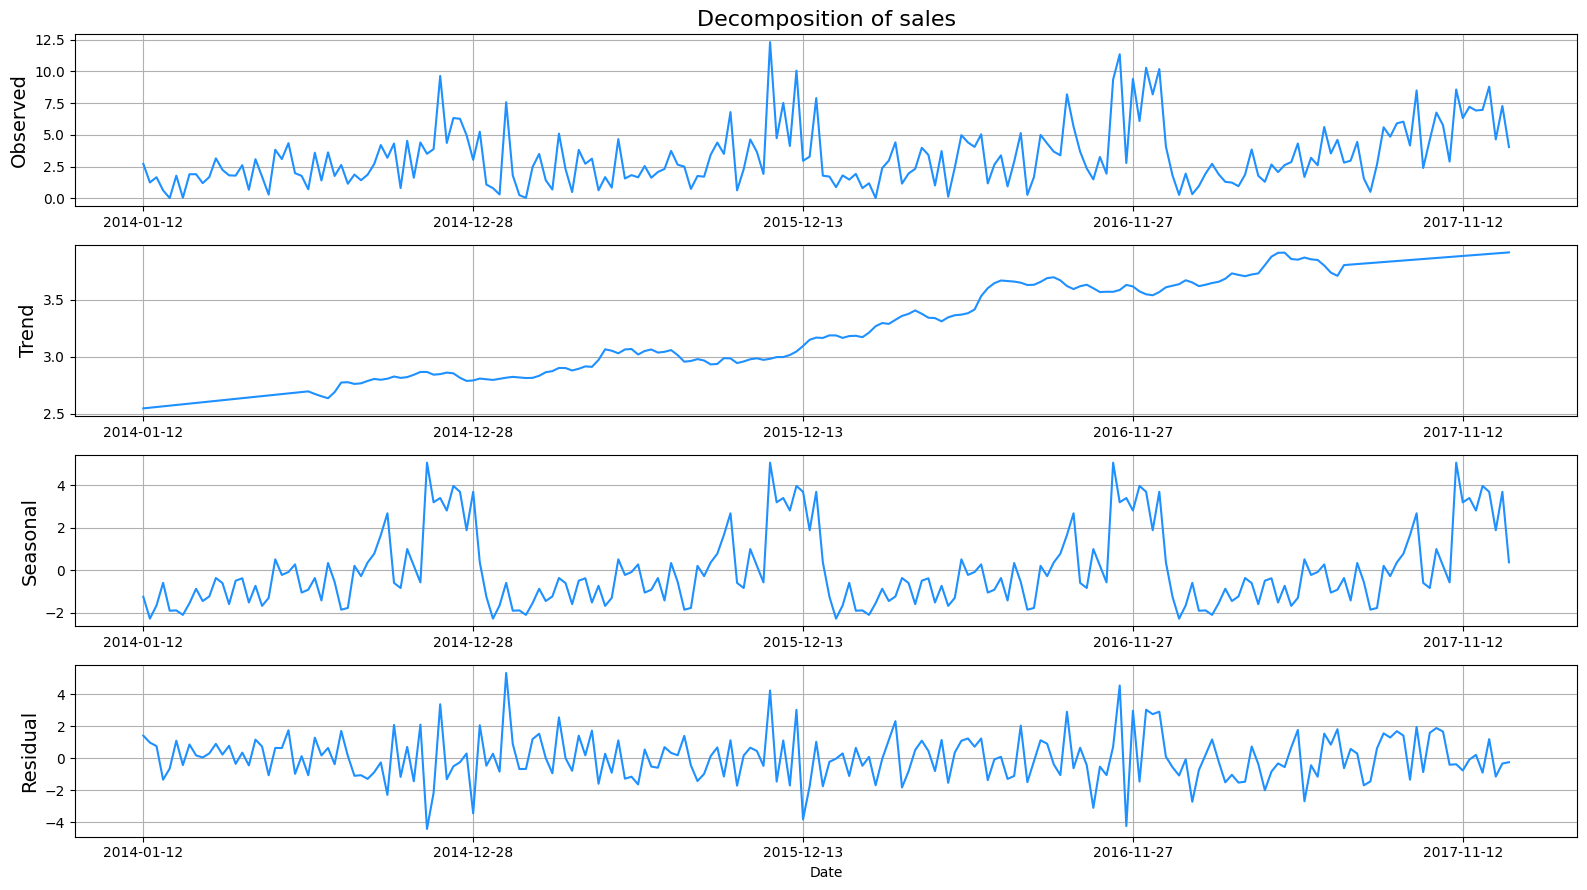

In [ ]:
column = 'sales'  # Specify the column name

fig, ax = plt.subplots(ncols=1, nrows=4, sharex=False, figsize=(16, 9))
fig.patch.set_facecolor('none')  # Set transparent background

res = seasonal_decompose(df[column], period=52, model='additive', extrapolate_trend='freq')

ax[0].set_title('Decomposition of {}'.format(column), fontsize=16)
res.observed.plot(ax=ax[0], legend=False, color='dodgerblue')
ax[0].set_ylabel('Observed', fontsize=14)
ax[0].set_xlabel('', fontsize=14)
ax[0].set_facecolor('none')
ax[0].grid(True)

res.trend.plot(ax=ax[1], legend=False, color='dodgerblue')
ax[1].set_ylabel('Trend', fontsize=14)
ax[1].set_xlabel('', fontsize=14)
ax[1].set_facecolor('none')
ax[1].grid(True)

res.seasonal.plot(ax=ax[2], legend=False, color='dodgerblue')
ax[2].set_ylabel('Seasonal', fontsize=14)
ax[2].set_xlabel('', fontsize=14)
ax[2].set_facecolor('none')
ax[2].grid(True)

res.resid.plot(ax=ax[3], legend=False, color='dodgerblue')
ax[3].set_ylabel('Residual', fontsize=14)
ax[3].set_facecolor('none')
ax[3].grid(True)

plt.tight_layout()
plt.show()


# Train - Test Splitting

In [ ]:
print(len(time))
print(len(df))

208
208


75% Training, 25% Testing

In [ ]:
split_time = 156  # Split time value
# 3 years for training, 1 year for testing (75%)
def reset_data(df):


  train = df.iloc[:split_time, :]

  # Define training set
  x_train = df.index[:split_time]
  y_train = df['sales'][:split_time]
  x_valid = df.index[split_time:]
  y_valid = df['sales'][split_time:]

  return train, x_train, y_train, x_valid, y_valid
# reset data
train, x_train, y_train, x_valid, y_valid = reset_data(df)

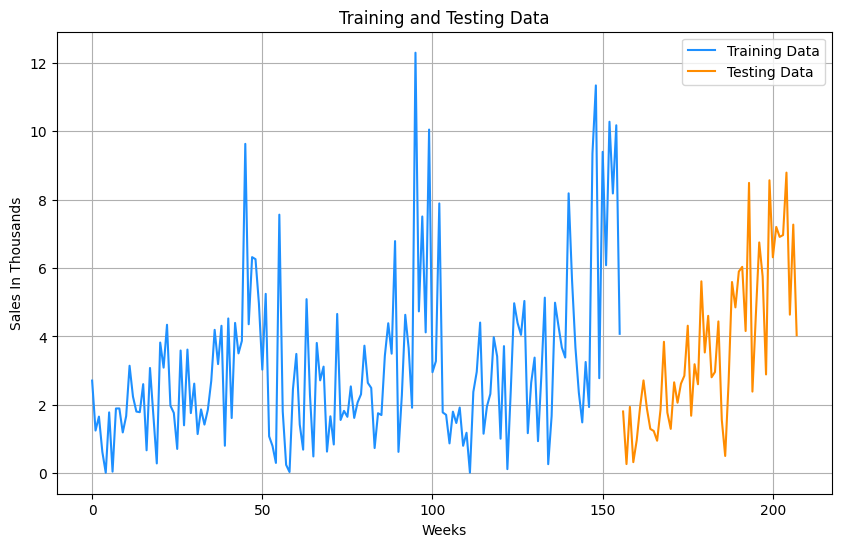

In [ ]:

plt.figure(figsize=(10, 6))

# Plot training data in one color
plt.plot(time[:split_time], y_train, color='dodgerblue', label='Training Data')

# Plot testing data in another color
plt.plot(time[split_time:], y_valid, color='darkorange', label='Testing Data')

plt.title("Training and Testing Data")
plt.xlabel("Weeks")
plt.ylabel("Sales In Thousands")
plt.legend()
plt.grid(True)
# Set ticks for x-axis at distant intervals
#plt.xticks(x_train[0], x_train[-1], step=30)

plt.show()


In [ ]:
'''
# Create a figure and axes
fig, ax = plt.subplots(figsize=(16, 9))

# Set the background color to transparent
fig.patch.set_facecolor('none')
ax.set_facecolor('none')

# Plot training data
ax.plot(x_train, y_train, color='blue', label='Training Data')

# Plot testing data
ax.plot(x_valid, y_valid, color='orange', label='Testing Data')

# Set plot title and labels
ax.set_title('Time Series Data')
ax.set_xlabel('Date')
ax.set_ylabel('Sales')

# Set legend
ax.legend()

# Display the plot
plt.show()
'''

"\n# Create a figure and axes\nfig, ax = plt.subplots(figsize=(16, 9))\n\n# Set the background color to transparent\nfig.patch.set_facecolor('none')\nax.set_facecolor('none')\n\n# Plot training data\nax.plot(x_train, y_train, color='blue', label='Training Data')\n\n# Plot testing data\nax.plot(x_valid, y_valid, color='orange', label='Testing Data')\n\n# Set plot title and labels\nax.set_title('Time Series Data')\nax.set_xlabel('Date')\nax.set_ylabel('Sales')\n\n# Set legend\nax.legend()\n\n# Display the plot\nplt.show()\n"

# Modeling

# ARIMA

Auto-ARIMA

In [ ]:
#!pip install pmdarima

In [ ]:
'''
import pmdarima as pm

# reset data
train, x_train, y_train, x_valid, y_valid = reset_data(weekly_data)


# Assuming you have your time series data stored in 'time_series'
model = pm.auto_arima(y_train, seasonal=True, m=52)

# Retrieve the optimal seasonal orders
#seasonal_order = model.get_params()['seasonal_order']
#print(seasonal_order)
print(model.summary())
'''

"\nimport pmdarima as pm\n\n# reset data\ntrain, x_train, y_train, x_valid, y_valid = reset_data(weekly_data)\n\n\n# Assuming you have your time series data stored in 'time_series'\nmodel = pm.auto_arima(y_train, seasonal=True, m=52)\n\n# Retrieve the optimal seasonal orders\n#seasonal_order = model.get_params()['seasonal_order']\n#print(seasonal_order)\nprint(model.summary())\n"

Prediction

In [ ]:
'''
import itertools
import statsmodels.api as sm
import numpy as np

# reset data
train, x_train, y_train, x_valid, y_valid = reset_data(weekly_data)

# Define the parameter ranges to search
p = range(1, 2)  # Order of the autoregressive (AR) component
d = range(0, 1)  # Order of differencing (I) component
q = range(0, 1)  # Order of the moving average (MA) component
P = range(0, 3)  # Order of the seasonal AR component
D = range(0, 3)  # Order of seasonal differencing
Q = range(0, 3)  # Order of the seasonal MA component

# Create all possible combinations of the parameter values
param_combinations = list(itertools.product(p, d, q, P, D, Q))

# Initialize variables to store the best parameters and metric value
best_params = None
best_metric = np.inf

# Iterate over each parameter combination
i = 0
for params in param_combinations:
    try:
        # Fit the SARIMAX model with the current parameters
        model = sm.tsa.SARIMAX(y_train, order=(params[0], params[1], params[2]), seasonal_order=(params[3], params[4], params[5], 52))

        model_fit = model.fit()

        # Evaluate the model using a chosen metric (e.g., BIC)
        #metric = model_fit.bic
        score_mae = mean_absolute_error(y_valid, y_pred)
        metric = score_mae
        # Update the best parameters and metric if necessary
        if metric < best_metric:
            best_params = params
            best_metric = metric
        print(i)
        print("Best Parameters inside:", best_params)
        print("Best Metric Value inside:", best_metric)
        i = i + 1
    except:
        continue

# Print the best parameters and metric
print("Best Parameters:", best_params)
print("Best Metric Value:", best_metric)
'''

'\nimport itertools\nimport statsmodels.api as sm\nimport numpy as np\n\n# reset data\ntrain, x_train, y_train, x_valid, y_valid = reset_data(weekly_data)\n\n# Define the parameter ranges to search\np = range(1, 2)  # Order of the autoregressive (AR) component\nd = range(0, 1)  # Order of differencing (I) component\nq = range(0, 1)  # Order of the moving average (MA) component\nP = range(0, 3)  # Order of the seasonal AR component\nD = range(0, 3)  # Order of seasonal differencing\nQ = range(0, 3)  # Order of the seasonal MA component\n\n# Create all possible combinations of the parameter values\nparam_combinations = list(itertools.product(p, d, q, P, D, Q))\n\n# Initialize variables to store the best parameters and metric value\nbest_params = None\nbest_metric = np.inf\n\n# Iterate over each parameter combination\ni = 0\nfor params in param_combinations:\n    try:\n        # Fit the SARIMAX model with the current parameters\n        model = sm.tsa.SARIMAX(y_train, order=(params[0], pa

In [ ]:
# Define function
def sarimax_gridsearch(ts, pdq, pdqs, maxiter=50, freq='W'):
    '''
    Input:
        ts : your time series data
        pdq : ARIMA combinations from above
        pdqs : seasonal ARIMA combinations from above
        maxiter : number of iterations, increase if your model isn't converging
        frequency : default='M' for month. Change to suit your time series frequency
            e.g. 'D' for day, 'H' for hour, 'Y' for year.

    Return:
        Prints out top 5 parameter combinations
        Returns dataframe of parameter combinations ranked by BIC
    '''

    # Run a grid search with pdq and seasonal pdq parameters and get the best BIC value
    ans = []
    for comb in pdq:
        for combs in pdqs:
            try:
                mod = sm.tsa.statespace.SARIMAX(ts, # this is your time series you will input
                                                order=comb,
                                                seasonal_order=combs,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False,
                                                freq=freq)

                output = mod.fit(maxiter=maxiter)
                ans.append([comb, combs, output.bic])
                print('SARIMAX {} x {}52 : BIC Calculated ={}'.format(comb, combs, output.bic))
            except:
                continue

    # Find the parameters with minimal BIC value

    # Convert into dataframe
    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'bic'])

    # Sort and return top 5 combinations
    ans_df = ans_df.sort_values(by=['bic'],ascending=True)[0:5]

    return ans_df

In [ ]:
'''
import itertools
import statsmodels.api as sm

### Define Parameter Ranges to Test ###

# Note: higher numbers will result in code taking much longer to run
# Here we have it set to test p,d,q each = 0, 1 & 2

# Define the p, d and q parameters to take any value between 0 and 3 (exclusive)
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
# Note: here we have 12 in the 's' position as we have monthly data
# You'll want to change this according to your time series' frequency
pdqs = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]

### Run Grid Search ###

# Note: this code will take a while to run



### Apply function to your time series data ###

# Remember to change frequency to match your time series data
d = sarimax_gridsearch(y_train, pdq, pdqs, freq='W')
print(d)
'''

"\nimport itertools\nimport statsmodels.api as sm\n\n### Define Parameter Ranges to Test ###\n\n# Note: higher numbers will result in code taking much longer to run\n# Here we have it set to test p,d,q each = 0, 1 & 2\n\n# Define the p, d and q parameters to take any value between 0 and 3 (exclusive)\np = d = q = range(0, 3)\n\n# Generate all different combinations of p, q and q triplets\npdq = list(itertools.product(p, d, q))\n\n# Generate all different combinations of seasonal p, q and q triplets\n# Note: here we have 12 in the 's' position as we have monthly data\n# You'll want to change this according to your time series' frequency\npdqs = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]\n\n### Run Grid Search ###\n\n# Note: this code will take a while to run\n\n\n\n### Apply function to your time series data ###\n\n# Remember to change frequency to match your time series data\nd = sarimax_gridsearch(y_train, pdq, pdqs, freq='W')\nprint(d)\n"

In [ ]:
# Assuming y_true contains the true target values and y_pred contains the predicted values
def r2_score(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    SS_res = np.sum((y_true - y_pred)**2)
    SS_tot = np.sum((y_true - np.mean(y_true))**2)
    r2 = 1 - (SS_res / SS_tot)
    return r2

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


AIC 227.6953102892241
BIC 238.92251635467144
MAE: 1.6157168748203954
RMSE: 1.8980280336259907
R2 score: 0.3048094895413307


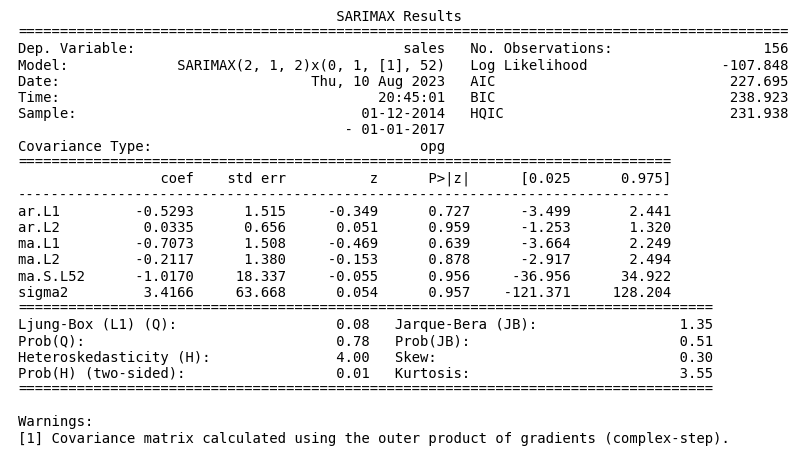

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# reset data
train, x_train, y_train, x_valid, y_valid = reset_data(df)

# Fit model
model = SARIMAX(y_train,order=(2,1,2), seasonal_order=(0,1,1,52),
                                 enforce_stationarity=False, enforce_invertibility=False,)
model_fit = model.fit()

# Save model summary as a figure
model_summary = model_fit.summary()
fig = plt.figure(figsize=(9, 5))
plt.text(0.01, 0.05, model_summary.as_text(), {'fontsize': 10}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.savefig('model_summary.png')  # Save the figure as an image
print('AIC', model_fit.aic)
print('BIC', model_fit.bic)
# Prediction with SARIMAX
y_pred = model_fit.forecast(steps=52)

# Calculate metrics
score_mae = mean_absolute_error(y_valid, y_pred)
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred))
r2 = r2_score(y_valid, y_pred)

print('MAE: {}'.format(score_mae))
print('RMSE: {}'.format(score_rmse))
print("R2 score:", r2)


In [ ]:
'''from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# ... (rest of your code)

# Fit model
model = SARIMAX(y_train, order=(2,1,2), seasonal_order=(0,1,1,52),
                enforce_stationarity=False, enforce_invertibility=False)
model_fit = model.fit()

# Save model summary as a figure
model_summary = model_fit.summary()
fig = plt.figure(figsize=(10, 8))
plt.text(0.01, 0.05, model_summary.as_text(), {'fontsize': 10}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.savefig('model_summary.png')  # Save the figure as an image

# ... (rest of your code)
'''

"from statsmodels.tsa.statespace.sarimax import SARIMAX\nimport matplotlib.pyplot as plt\n\n# ... (rest of your code)\n\n# Fit model\nmodel = SARIMAX(y_train, order=(2,1,2), seasonal_order=(0,1,1,52),\n                enforce_stationarity=False, enforce_invertibility=False)\nmodel_fit = model.fit()\n\n# Save model summary as a figure\nmodel_summary = model_fit.summary()\nfig = plt.figure(figsize=(10, 8))\nplt.text(0.01, 0.05, model_summary.as_text(), {'fontsize': 10}, fontproperties = 'monospace')\nplt.axis('off')\nplt.tight_layout()\nplt.savefig('model_summary.png')  # Save the figure as an image\n\n# ... (rest of your code)\n"

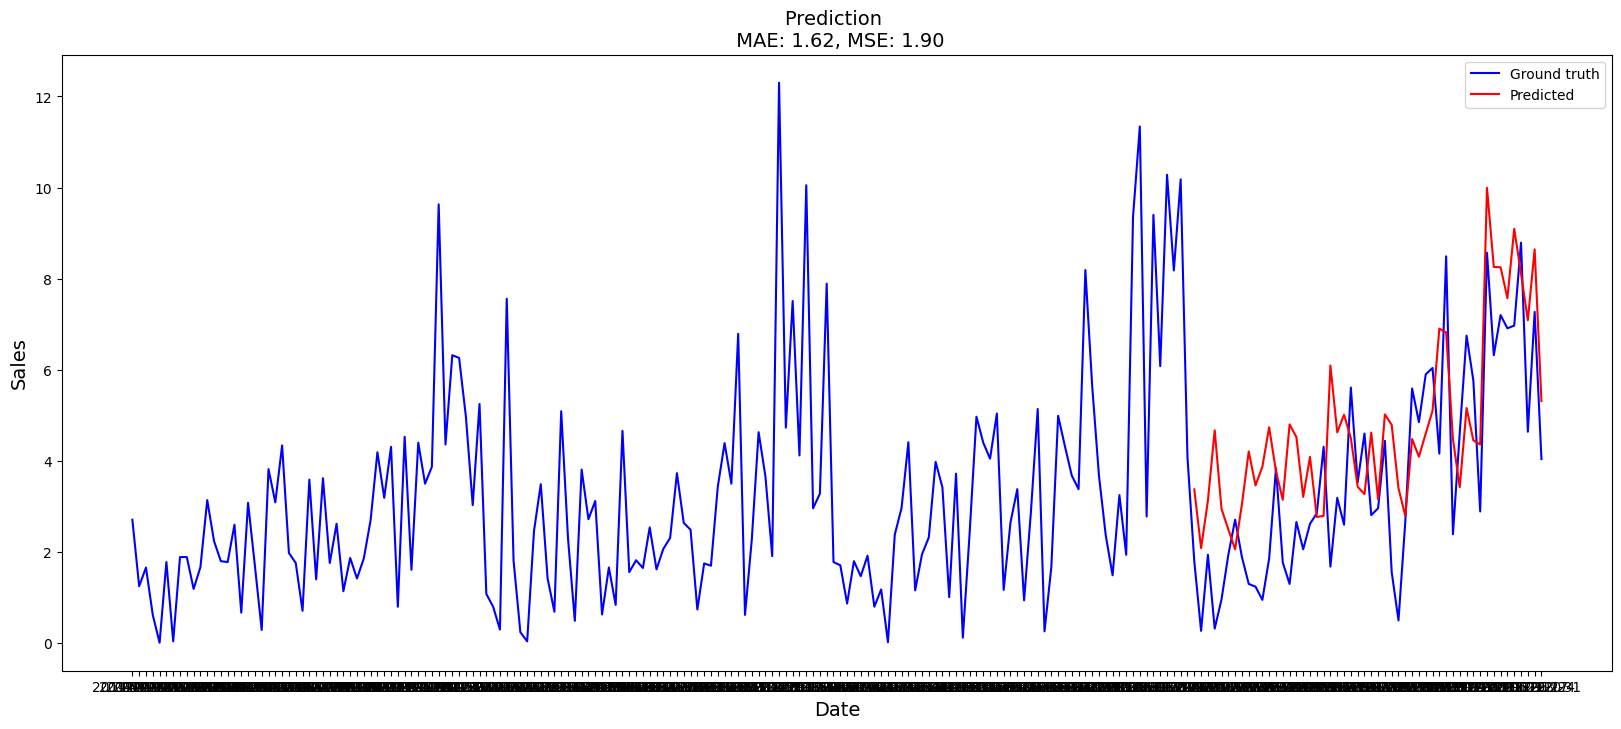

In [ ]:
f, ax = plt.subplots(1)
f.set_figheight(8)
f.set_figwidth(20)
f.patch.set_alpha(0)  # Set transparent background

# Combine training and validation sets
y_combined = np.concatenate([y_train, y_valid])
x_combined = df.index

# Plot original data
sns.lineplot(x=x_combined, y=y_combined, ax=ax, color='blue', label='Ground truth')

# Plot predicted results
sns.lineplot(x=x_valid, y=y_pred, ax=ax, color='red', label='Predicted')

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, MSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Sales', fontsize=14)

plt.show()

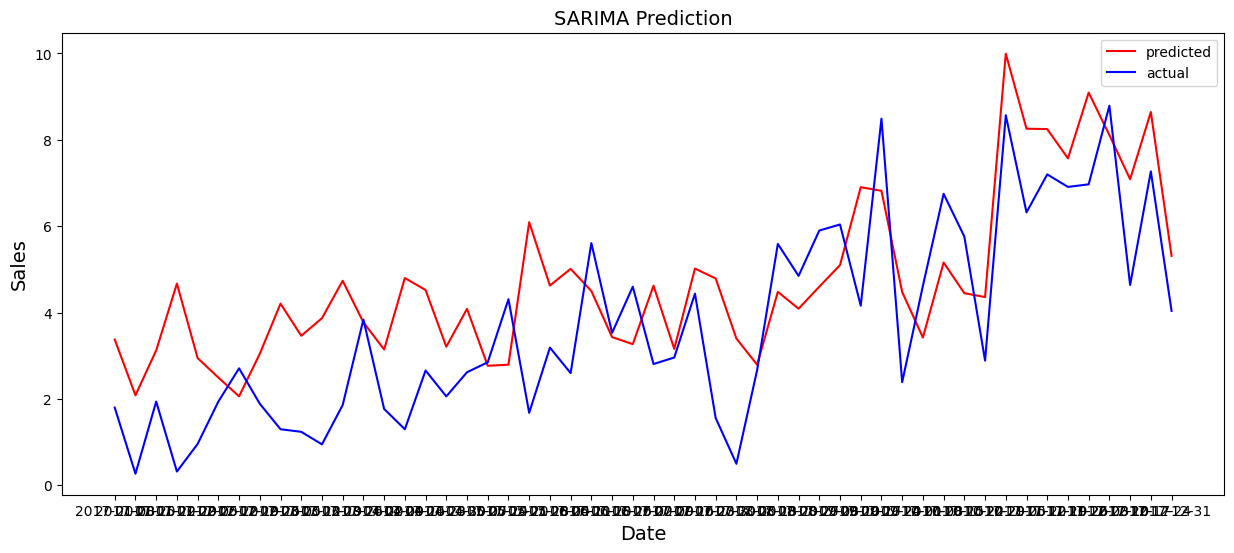

In [ ]:
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)
# Set the background color to transparent
f.patch.set_facecolor('none')
ax.set_facecolor('none')
sns.lineplot(x=x_valid, y=y_pred, ax=ax, color='red', label='predicted') #navajowhite
sns.lineplot(x=x_valid, y=y_valid, ax=ax, color='blue', label='actual') #navajowhite
ax.set_title(f'SARIMA Prediction', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Sales', fontsize=14)

plt.show()

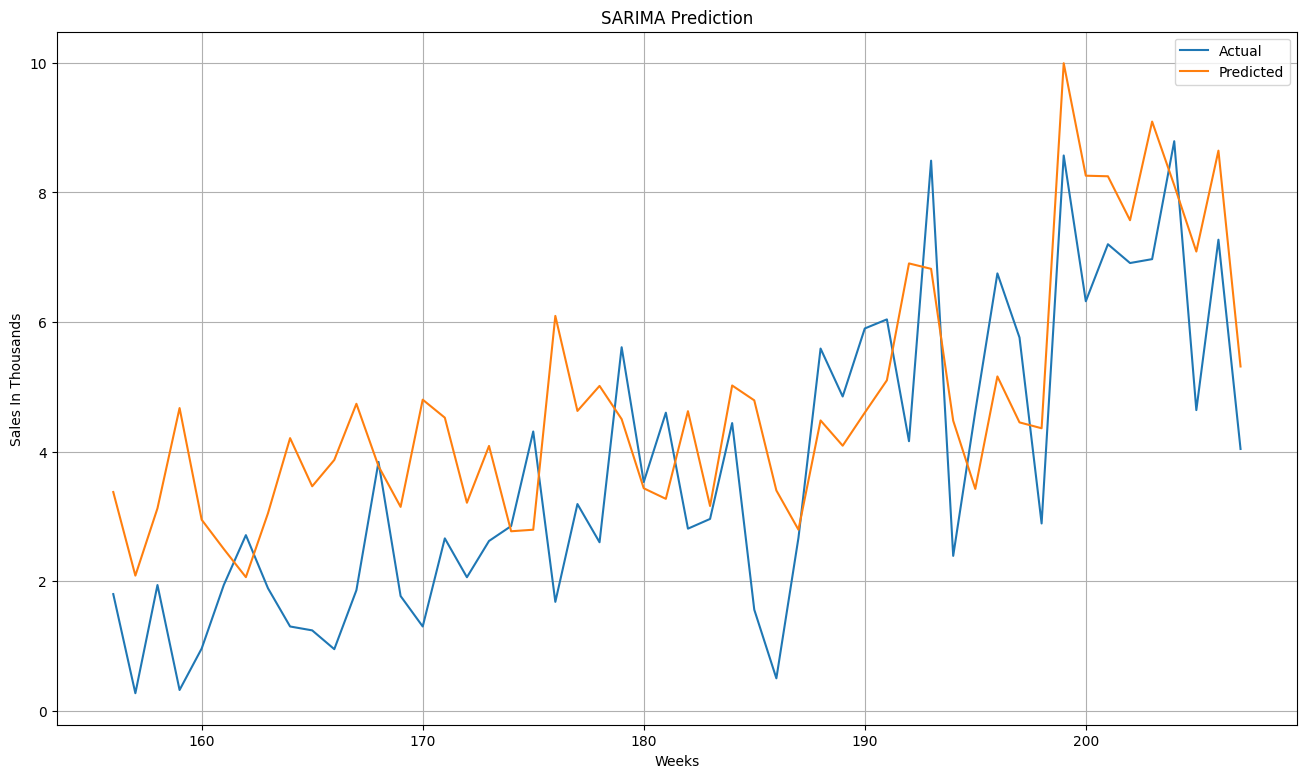

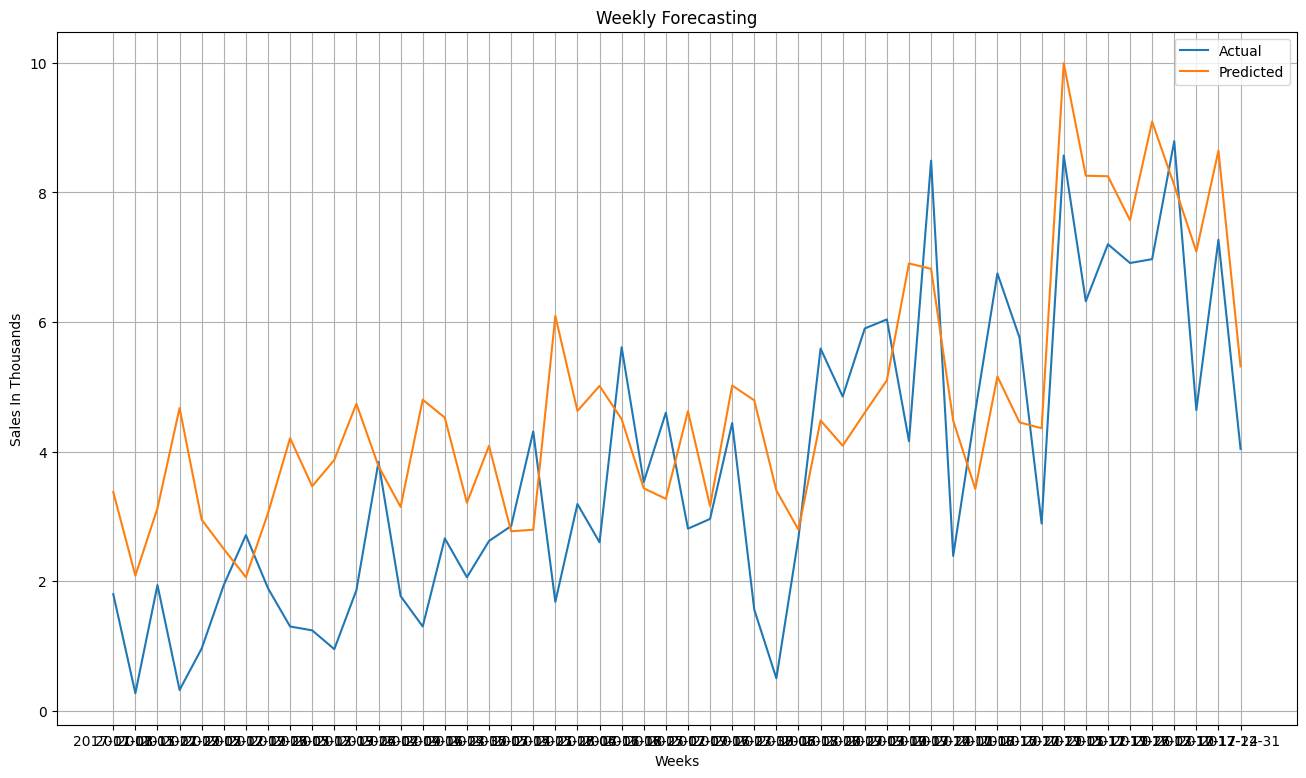

In [ ]:
plot_series(time[split_time:], (y_valid, y_pred), '-', 0, None, 'SARIMA Prediction', 'Weeks', 'Sales In Thousands', legend = ("Actual", "Predicted"))
plot_series(df.index[split_time:], (y_valid, y_pred), '-', 0, None, 'Weekly Forecasting', 'Weeks', 'Sales In Thousands', legend = ("Actual", "Predicted"))